In [1]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import Utils.graphing_helpers
import read_data as rd
import importlib
importlib.reload(Utils.graphing_helpers)
from Utils.graphing_helpers import (plot_vicsek_phase_diagram, plot_dir_cross_vel_phase_diagram,  plot_dir_cross_vel_norm_phase_diagram, 
                                    save_fig_pdf, edges_from_centers_log, edges_from_centers_linear)
from Analysis_Calculations.local_packing_fraction import get_local_packing_fraction

In [2]:
vicsek_values = []
dir_cross_vel_values = []
peak_distance_values = []
parameter_values = []

In [ ]:
save_dir = "/home/ryanlopez/Velocity_Align_Big_Phase_Diagrams"
for phi in [0.8]: #0.4, 0.6, 0.8
    for v0 in [0.01, 0.03, 0.1]:
        if phi == 0.8 and v0 == 0.1:
            continue
        for Jv in np.logspace(-3, 0, num=13):
            for Dr in np.logspace(-3, 0, num=13):
                J = Jv/v0
                exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
                run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
                run_dir = os.path.join(save_dir, exp_folder_name, run_folder_name)
                single_stats_filename = os.path.join(run_dir, 'single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                vicsek_values.append(single_stats['vicsek_param'])
                dir_cross_vel_values.append(single_stats['dir_cross_vel_norm'])
                #peak_distance_values.append(single_stats['packing_peak_distance'])
                parameter_values.append([phi, v0, J, Dr])

In [ ]:
save_dir = "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Cutoff_Saved_Data3"
for phi in [0.6]:
    for v0 in [0.0026, 0.0120, 0.0600, 0.2500]:
        for Jv in np.logspace(-2, 0, num=7):
            for Dr in np.logspace(-3, -1, num=7):
                J = Jv/v0
                exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
                run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
                run_dir = os.path.join(save_dir, exp_folder_name, run_folder_name)
                single_stats_filename = os.path.join(run_dir, 'single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                vicsek_values.append(single_stats['vicsek_param'])
                dir_cross_vel_values.append(single_stats['dir_cross_vel_norm'])
                #peak_distance_values.append(single_stats['packing_peak_distance'])
                parameter_values.append([phi, v0, J, Dr])

In [3]:
save_dir = "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"
for phi in [1.0]: #0.4, 0.6, 0.8, 1.0
    for v0 in [0.01, 0.03, 0.1]:
        for Jv in np.logspace(-3, 0, num=4):
            for Dr in np.logspace(-3, 0, num=4):
                J = Jv/v0
                exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
                run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
                run_dir = os.path.join(save_dir, exp_folder_name, run_folder_name)
                single_stats_filename = os.path.join(run_dir, 'single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                vicsek_values.append(single_stats['vicsek_param'])
                dir_cross_vel_values.append(single_stats['dir_cross_vel_norm'])
                #peak_distance_values.append(single_stats['packing_peak_distance'])
                parameter_values.append([phi, v0, J, Dr])

In [4]:
dir_cross_vel_values = np.array(dir_cross_vel_values)
peak_distance_values = np.array(peak_distance_values)
vicsek_values = np.array(vicsek_values)
parameter_values = np.array(parameter_values)

In [5]:
phi_points = parameter_values[:,0]
v0_points = parameter_values[:,1]
J_points = parameter_values[:,2]
Dr_points = parameter_values[:,3]

In [6]:
data_points_x = J_points * v0_points/ Dr_points
data_points_y = Dr_points / (v0_points * phi_points)

In [7]:
len(data_points_x)

48

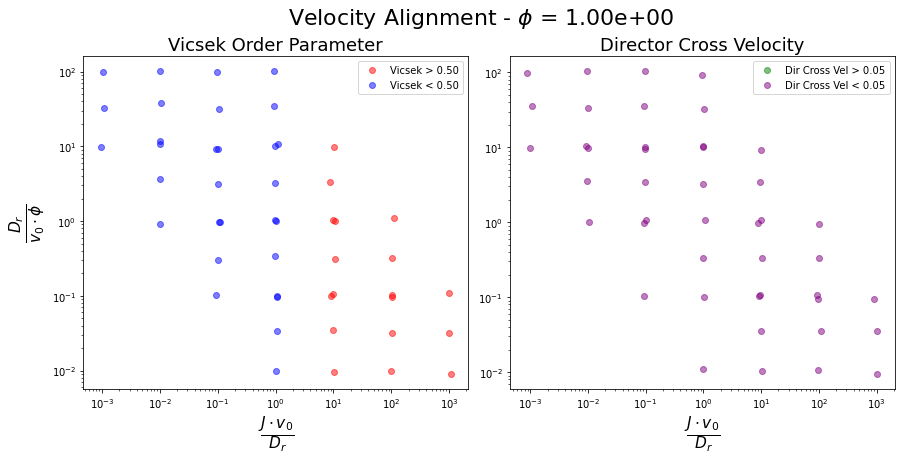

In [8]:
save_dir = "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"
#fig, axs = plt.subplots(1, 3, figsize=(17,6))
fig, axs = plt.subplots(1, 2, figsize=(12,6))
fig.tight_layout(rect=[0, 0.03, 1, 0.9])
fig.suptitle(rf'Velocity Alignment - $\phi$ = {phi:.2e}', fontsize=22)

#Vicsek
cutoff = 0.5
flocking_x = data_points_x[vicsek_values > cutoff]
flocking_y = data_points_y[vicsek_values > cutoff]
not_flocking_x = data_points_x[vicsek_values < cutoff]
not_flocking_y = data_points_y[vicsek_values < cutoff]
#Add Noise
flocking_x = flocking_x * np.random.normal(1, 0.05, flocking_x.shape)
flocking_y = flocking_y * np.random.normal(1, 0.05, flocking_y.shape)
not_flocking_x = not_flocking_x * np.random.normal(1, 0.05, not_flocking_x.shape)
not_flocking_y = not_flocking_y * np.random.normal(1, 0.05, not_flocking_y.shape)
#Make Plot
axs[0].scatter(flocking_x, flocking_y, c='red', label=f'Vicsek > {cutoff:.2f}', alpha=0.5)
axs[0].scatter(not_flocking_x, not_flocking_y, c='blue', label=f'Vicsek < {cutoff:.2f}', alpha=0.5)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()
axs[0].set_xlabel(r'$\frac{J \cdot v_0}{D_r}$', fontsize=22)
axs[0].set_ylabel(r'$\frac{D_r}{v_0 \cdot \phi}$', fontsize=22)
axs[0].set_title('Vicsek Order Parameter', fontsize=18)

#Dir Cross Vel Norm
cutoff = 0.05
flocking_x = data_points_x[dir_cross_vel_values > cutoff]
flocking_y = data_points_y[dir_cross_vel_values > cutoff]
not_flocking_x = data_points_x[dir_cross_vel_values < cutoff]
not_flocking_y = data_points_y[dir_cross_vel_values < cutoff]
#Add Noise
flocking_x = flocking_x * np.random.normal(1, 0.05, flocking_x.shape)
flocking_y = flocking_y * np.random.normal(1, 0.05, flocking_y.shape)
not_flocking_x = not_flocking_x * np.random.normal(1, 0.05, not_flocking_x.shape)
not_flocking_y = not_flocking_y * np.random.normal(1, 0.05, not_flocking_y.shape)
#Make Plot
axs[1].scatter(flocking_x, flocking_y, c='green', label=f'Dir Cross Vel > {cutoff:.2f}', alpha=0.5)
axs[1].scatter(not_flocking_x, not_flocking_y, c='purple', label=f'Dir Cross Vel < {cutoff:.2f}', alpha=0.5)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()
axs[1].set_xlabel(r'$\frac{J \cdot v_0}{D_r}$', fontsize=22)
axs[1].set_title('Director Cross Velocity', fontsize=18)

#Packing Peak Diff
"""
cutoff = 0.1
flocking_x = data_points_x[peak_distance_values > cutoff]
flocking_y = data_points_y[peak_distance_values > cutoff]
not_flocking_x = data_points_x[peak_distance_values < cutoff]
not_flocking_y = data_points_y[peak_distance_values < cutoff]
#Add Noise
flocking_x = flocking_x * np.random.normal(1, 0.05, flocking_x.shape)
flocking_y = flocking_y * np.random.normal(1, 0.05, flocking_y.shape)
not_flocking_x = not_flocking_x * np.random.normal(1, 0.05, not_flocking_x.shape)
not_flocking_y = not_flocking_y * np.random.normal(1, 0.05, not_flocking_y.shape)
#Make Plot
axs[2].scatter(flocking_x, flocking_y, c='orange', label=f'Peak Distance > {cutoff:.2f}', alpha=0.5)
axs[2].scatter(not_flocking_x, not_flocking_y, c='black', label=f'Peak Distance < {cutoff:.2f}', alpha=0.5)
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()
axs[2].set_xlabel(r'$\frac{J}{D_r}$', fontsize=22)
axs[2].set_title('Packing Fraction Peak Distances', fontsize=18)
"""
save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', f'dots_diagrams_phi={phi:.4f}.pdf'))

# This Loads All My Previously Simulated Data

In [ ]:
base_for_load_dir = '/home/ryanlopez/Polar_Align_Saved_Data'
different_load_folder_names = ['Big_J_Packing_Phase_Diagram', 'glass_vary_J_Dr', 'J_Packing_Phase_Diagram', 
                        'J_Packing_v0=0.15_Phase_Diagram', 'liquid_vary_J_Dr', 'looking_for_vortices',
                        'phi=0.6000_and_v0=0.0100_high_resolution']
for load_folder_name in different_load_folder_names:
    load_dir = os.path.join(base_for_load_dir, load_folder_name)

In [ ]:
new_vicsek_values = []
new_dir_cross_vel_values = []
new_parameter_values = []

In [ ]:
load_dir = os.path.join(base_for_load_dir, 'Big_J_Packing_Phase_Diagram')
for phi in [0.4, 0.6, 0.8, 1.0]:
    for v0 in [0.03]:
        for Dr in [0.1]:
            for J in np.linspace(0, 2, num=11):
                run_folder_1 = f'J={J:.4f}_and_packing={phi:.4f}'
                run_folder_2 = f'J={J:.4f}_and_packing={phi+1e-4:.4f}'
                run_folder_3 = f'J={J:.4f}_and_packing={phi+2e-4:.4f}'
                if os.path.isdir(os.path.join(load_dir, run_folder_1)):
                    run_dir = os.path.join(load_dir, run_folder_1)
                elif os.path.isdir(os.path.join(load_dir, run_folder_2)):
                    run_dir = os.path.join(load_dir, run_folder_2)
                elif os.path.isdir(os.path.join(load_dir, run_folder_3)):
                    run_dir = os.path.join(load_dir, run_folder_3)
                else:
                    print('Error - Didnt get a run_dir')
                single_stats_filename = os.path.join(run_dir, 'single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                new_vicsek_values.append(single_stats['vicsek_param'])
                new_dir_cross_vel_values.append(single_stats['dir_cross_vel_norm'])
                new_parameter_values.append([phi, v0, J, Dr])

In [ ]:
load_dir = os.path.join(base_for_load_dir, 'glass_vary_J_Dr')
Teff = 1e-3
for phi in [1.0]:
    for Dr in np.linspace(0, 0.2, num=7)[1:]:
        for J in np.linspace(0, 0.2, num=7):
            v0 = np.sqrt(2*Dr*Teff)
            run_folder = f'Dr={Dr:.4f}_and_J={J:.4f}'
            run_dir = os.path.join(load_dir, run_folder)
            single_stats_filename = os.path.join(run_dir, 'single_stats.json')
            with open(single_stats_filename, 'r') as single_stats_file:
                single_stats = json.loads(single_stats_file.read())
            new_vicsek_values.append(single_stats['vicsek_param'])
            new_dir_cross_vel_values.append(single_stats['dir_cross_vel_norm'])
            new_parameter_values.append([phi, v0, J, Dr])

In [ ]:
load_dir = os.path.join(base_for_load_dir, 'J_Packing_Phase_Diagram')
for phi in [0.4, 0.6, 0.8, 1.0]:
    for v0 in [0.03]:
        for Dr in [0.1]:
            for J in np.linspace(0, 0.4, num=21):
                run_folder_1 = f'J={J:.4f}_and_packing={phi:.4f}'
                run_folder_2 = f'J={J:.4f}_and_packing={phi+1e-4:.4f}'
                run_folder_3 = f'J={J:.4f}_and_packing={phi+2e-4:.4f}'
                if os.path.isdir(os.path.join(load_dir, run_folder_1)):
                    run_dir = os.path.join(load_dir, run_folder_1)
                elif os.path.isdir(os.path.join(load_dir, run_folder_2)):
                    run_dir = os.path.join(load_dir, run_folder_2)
                elif os.path.isdir(os.path.join(load_dir, run_folder_3)):
                    run_dir = os.path.join(load_dir, run_folder_3)
                else:
                    print('Error - Didnt get a run_dir')
                single_stats_filename = os.path.join(run_dir, 'single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                new_vicsek_values.append(single_stats['vicsek_param'])
                new_dir_cross_vel_values.append(single_stats['dir_cross_vel_norm'])
                new_parameter_values.append([phi, v0, J, Dr])

In [ ]:
load_dir = os.path.join(base_for_load_dir, 'J_Packing_v0=0.15_Phase_Diagram')
for phi in [0.4, 0.6, 0.8, 1.0]:
    for v0 in [0.15]:
        for Dr in [0.1]:
            for J in np.linspace(0, 0.4, num=11):
                run_folder = f'packing={phi:.4f}_and_J={J:.4f}'
                run_dir = os.path.join(load_dir, run_folder)
                single_stats_filename = os.path.join(run_dir, 'single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                new_vicsek_values.append(single_stats['vicsek_param'])
                new_dir_cross_vel_values.append(single_stats['dir_cross_vel_norm'])
                new_parameter_values.append([phi, v0, J, Dr])

In [ ]:
load_dir = os.path.join(base_for_load_dir, 'liquid_vary_J_Dr')
Teff = 1e-2
for phi in [1.0]:
    for Dr in np.linspace(0, 0.2, num=7)[1:]:
        for J in np.linspace(0, 0.2, num=7):
            v0 = np.sqrt(2*Dr*Teff)
            run_folder = f'Dr={Dr:.4f}_and_J={J:.4f}'
            run_dir = os.path.join(load_dir, run_folder)
            single_stats_filename = os.path.join(run_dir, 'single_stats.json')
            with open(single_stats_filename, 'r') as single_stats_file:
                single_stats = json.loads(single_stats_file.read())
            new_vicsek_values.append(single_stats['vicsek_param'])
            new_dir_cross_vel_values.append(single_stats['dir_cross_vel_norm'])
            new_parameter_values.append([phi, v0, J, Dr])

In [ ]:
load_dir = os.path.join(base_for_load_dir, 'looking_for_vortices')
for phi in [1.0]:
    for v0 in [0.01]:
        for Dr in [0.01, 0.1, 1.0, 10.0]:
            for J in [0.01, 0.1, 1.0, 10.0]:
                run_folder = f'J={J:.4f}_and_Dr={Dr:.4f}'
                run_dir = os.path.join(load_dir, run_folder)
                single_stats_filename = os.path.join(run_dir, 'single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                new_vicsek_values.append(single_stats['vicsek_param'])
                new_dir_cross_vel_values.append(single_stats['dir_cross_vel_norm'])
                new_parameter_values.append([phi, v0, J, Dr])

In [ ]:
load_dir = os.path.join(base_for_load_dir, 'phi=0.6000_and_v0=0.0100_high_resolution')
for phi in [0.6]:
    for v0 in [0.01]:
        for Dr in np.linspace(0.02, 0.06, num=11):
            for J in np.linspace(0.2, 0.6, num=11):
                run_folder = f'J={J:.4f}_and_Dr={Dr:.4f}'
                run_dir = os.path.join(load_dir, run_folder)
                single_stats_filename = os.path.join(run_dir, 'single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                new_vicsek_values.append(single_stats['vicsek_param'])
                new_dir_cross_vel_values.append(single_stats['dir_cross_vel_norm'])
                new_parameter_values.append([phi, v0, J, Dr])

In [ ]:
parameter_values.extend(new_parameter_values)
vicsek_values.extend(new_vicsek_values)
dir_cross_vel_values.extend(new_dir_cross_vel_values)